In [1]:
import pandas as pd
data = pd.read_csv("./data/freefall.csv", index_col=0)
data.describecribe()

,time,location
count,100.000000,1.000000e+02
mean,250.000000,4.103956e+05
std,146.522832,3.709840e+05
min,0.000000,0.000000e+00
25%,124.997500,7.658593e+04
50%,250.000000,3.062812e+05
75%,375.002500,6.890859e+05
max,500.000000,1.225000e+06


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


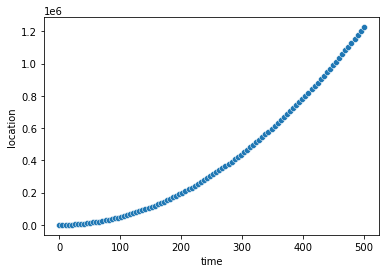

In [2]:
%matplotlib inline
import seaborn as sns
ax = sns.scatterplot(x='time', y='location', data=data)

In [3]:
data

,time,location
0,0.00,0.00
1,5.05,124.99
2,10.10,499.95
3,15.15,1124.89
4,20.20,1999.80
...,...,...
95,479.80,1128009.90
96,484.85,1151882.46
97,489.90,1176005.00
98,494.95,1200377.51


In [4]:
# 对数变换
import numpy as np
data.drop([0], inplace=True)  # 去掉0，不计算log0
data['logtime'] = np.log10(data['time'])
data['logloc'] = np.log10(data['location'])
data.head()

,time,location,logtime,logloc
1,5.05,124.99,0.703291,2.096875
2,10.10,499.95,1.004321,2.698927
3,15.15,1124.89,1.180413,3.051110
4,20.20,1999.80,1.305351,3.300987
5,25.25,3124.68,1.402261,3.494806


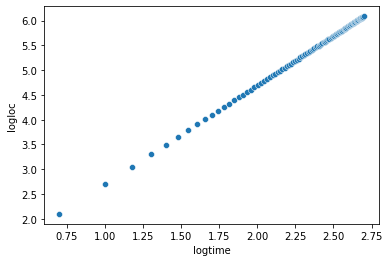

In [5]:
ax2 = sns.scatterplot(x='logtime', y='logloc', data=data)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data['logtime'].values.reshape(-1, 1),
       data['logloc'].values.reshape(-1, 1))
(reg.coef_, reg.intercept_)

(array([[1.99996182]]), array([0.69028797]))

In [7]:
# 多项式变换
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

# 项目描述

In [9]:
dc_data = pd.read_csv("./data/sample_data.csv")
dc_data.head()

,MONTH,AIR_TIME
0,1,28
1,1,29
2,1,29
3,1,29
4,1,29


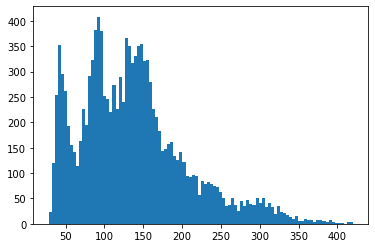

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
h = plt.hist(dc_data['AIR_TIME'], bins=100)

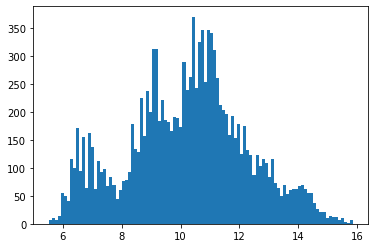

In [12]:
from scipy import stats
transform = np.asarray(dc_data['AIR_TIME'].values)
dft = stats.boxcox(transform)[0]
hbc = plt.hist(dft, bins=100)

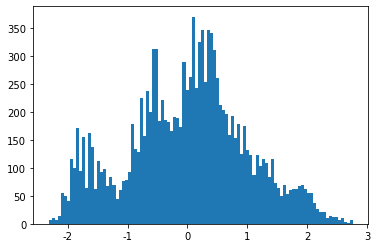

In [13]:
from sklearn.preprocessing import power_transform
dft2 = power_transform(dc_data[['AIR_TIME']],
                      method='box-cox')
hbcs = plt.hist(dft2, bins=100)

# 动手练习

In [14]:
df = pd.read_csv("./data/xsin.csv")
df

,Unnamed: 0,x,y
0,0,0.202020,0.040535
1,1,0.707071,0.459320
2,2,0.808081,0.584212
3,3,1.313131,1.269782
4,4,1.616162,1.614499
5,5,2.222222,1.767156
6,6,2.424242,1.593673
7,7,2.626263,1.294280
8,8,3.030303,0.336546
9,9,3.333333,-0.635227


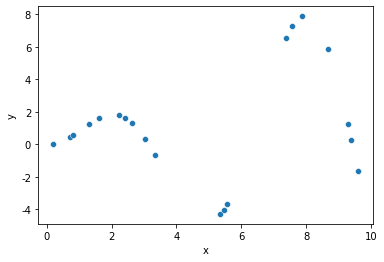

In [15]:
ax = sns.scatterplot(x='x', y='y', data=df)

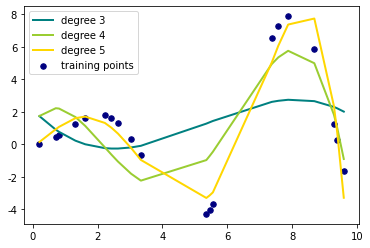

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df = pd.read_csv("./data/xsin.csv")
colors = ['teal', 'yellowgreen', 'gold']
plt.scatter(df['x'], df['y'], color='navy', s=30, marker='o', 
            label='training points')

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(df[['x']], df[['y']])
    y_pre = model.predict(df[['x']])
    plt.plot(df['x'], y_pre, color=colors[count], linewidth=2,
            label="degree %d" % degree)

plt.legend()